In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/FastagFraudDetection.csv')
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


In [3]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [4]:
df.select_dtypes('number').median()

Transaction_ID        2500.5
Transaction_Amount     130.0
Amount_paid            120.0
Vehicle_Speed           67.0
dtype: float64

In [5]:
df.select_dtypes('number').mode().iloc[0]

Transaction_ID         1.0
Transaction_Amount     0.0
Amount_paid            0.0
Vehicle_Speed         55.0
Name: 0, dtype: float64

In [6]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [7]:
df['FastagID'].fillna(df['FastagID'].mode()[0],inplace=True)

In [8]:
df.isnull().sum()

Transaction_ID           0
Timestamp                0
Vehicle_Type             0
FastagID                 0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Vehicle_Plate_Number     0
Fraud_indicator          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               5000 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [10]:
df.drop_duplicates(inplace=True)
df

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,FTG-000-QAZ-210,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1/1/2023 22:18,Truck,FTG-445-EDC-765,C-103,Regular,Large,330,330,"13.21331620748757, 77.55413526894684",81,KA74ST0123,Not Fraud
4996,4997,1/17/2023 13:43,Van,FTG-446-LMK-432,B-102,Express,Medium,125,125,"13.21331620748757, 77.55413526894684",64,KA38UV3456,Not Fraud
4997,4998,2/5/2023 5:08,Sedan,FTG-447-PLN-109,A-101,Regular,Medium,115,115,"13.21331620748757, 77.55413526894684",93,KA33WX6789,Not Fraud
4998,4999,2/20/2023 20:34,SUV,FTG-458-VFR-876,B-102,Express,Large,145,145,"13.21331620748757, 77.55413526894684",57,KA35YZ0123,Not Fraud


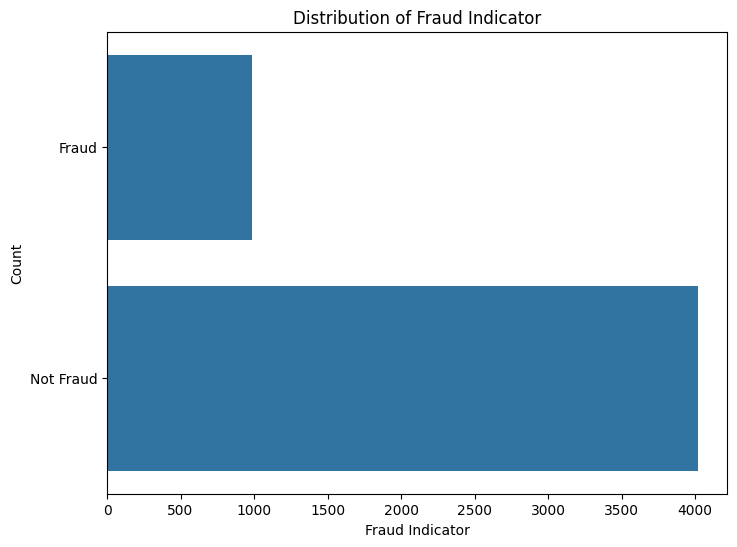

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df['Fraud_indicator'])
plt.title('Distribution of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

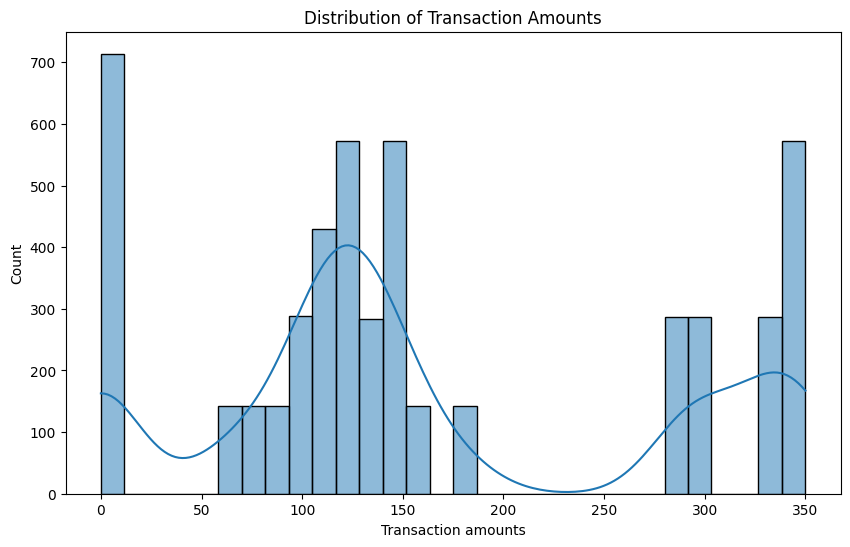

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Transaction_Amount'],bins=30,kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction amounts')
plt.show()

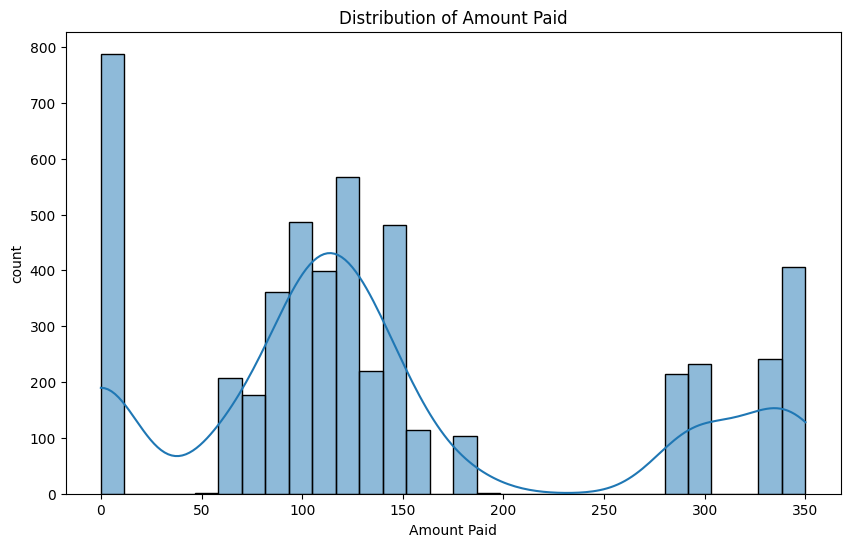

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount_paid'],bins=30,kde=True)
plt.title('Distribution of Amount Paid')
plt.xlabel('Amount Paid')
plt.ylabel('count')
plt.show()

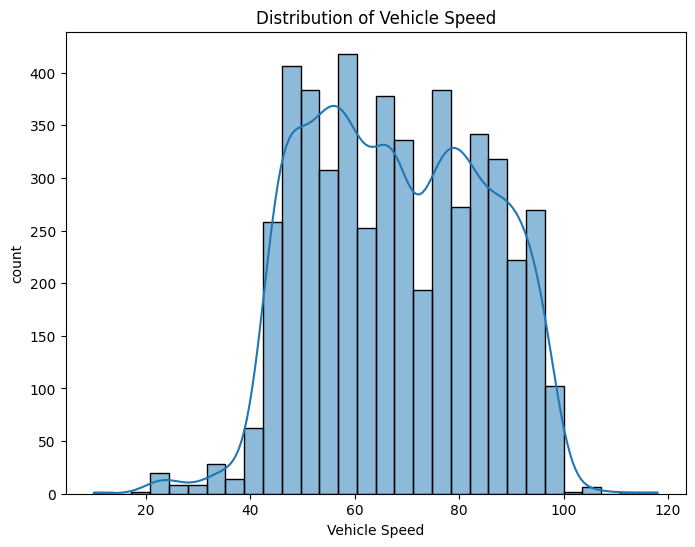

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['Vehicle_Speed'],bins=30,kde=True)
plt.title('Distribution of Vehicle Speed')
plt.xlabel('Vehicle Speed')
plt.ylabel('count')
plt.show()

Text(0.5, 1.0, 'Transaction Amount vs Amount Paid')

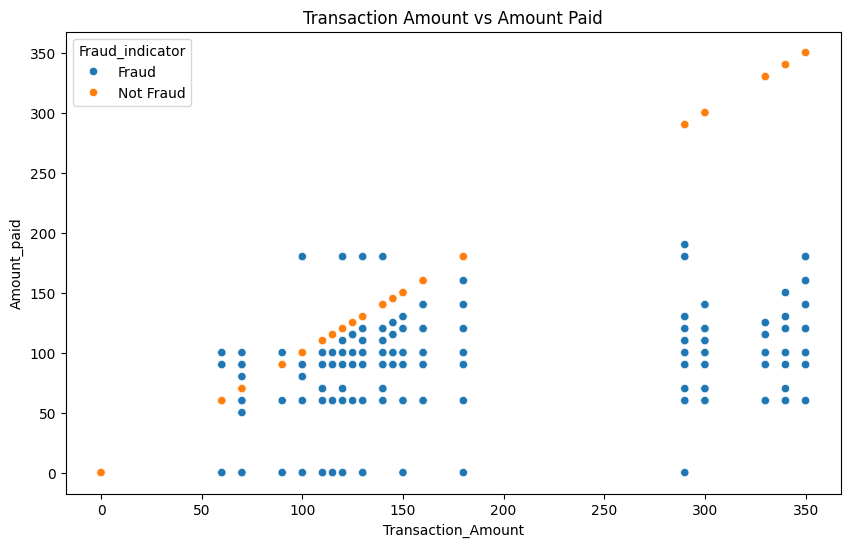

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transaction_Amount',y='Amount_paid',hue='Fraud_indicator',data=df)
plt.title('Transaction Amount vs Amount Paid')

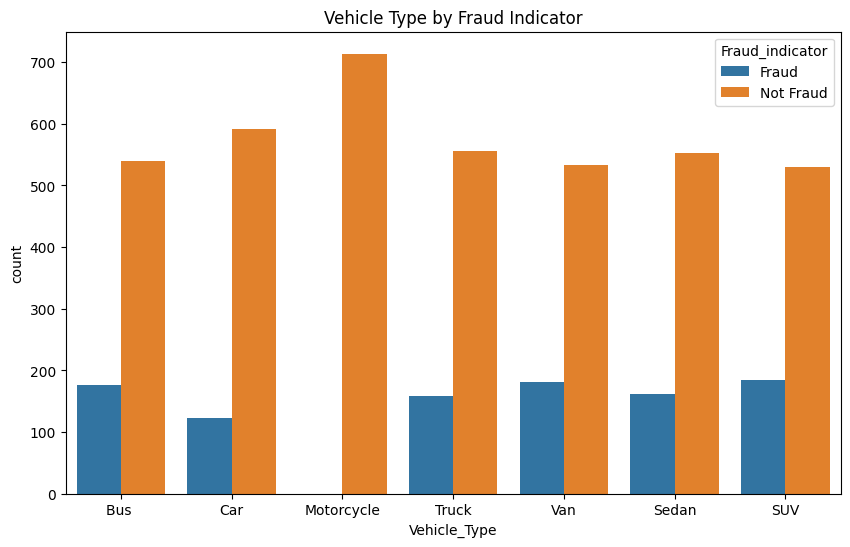

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='Vehicle_Type',hue='Fraud_indicator',data=df)
plt.title('Vehicle Type by Fraud Indicator')
plt.show()

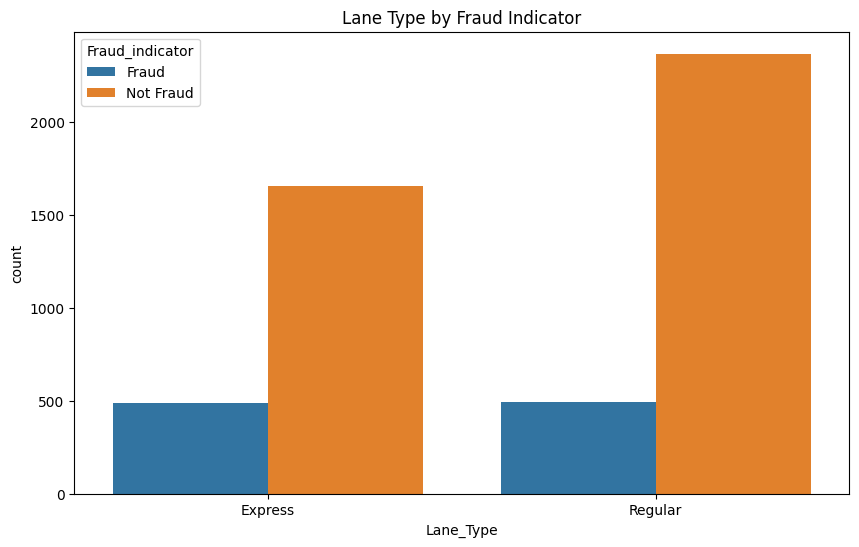

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Lane_Type',hue='Fraud_indicator',data=df)
plt.title('Lane Type by Fraud Indicator')
plt.show()

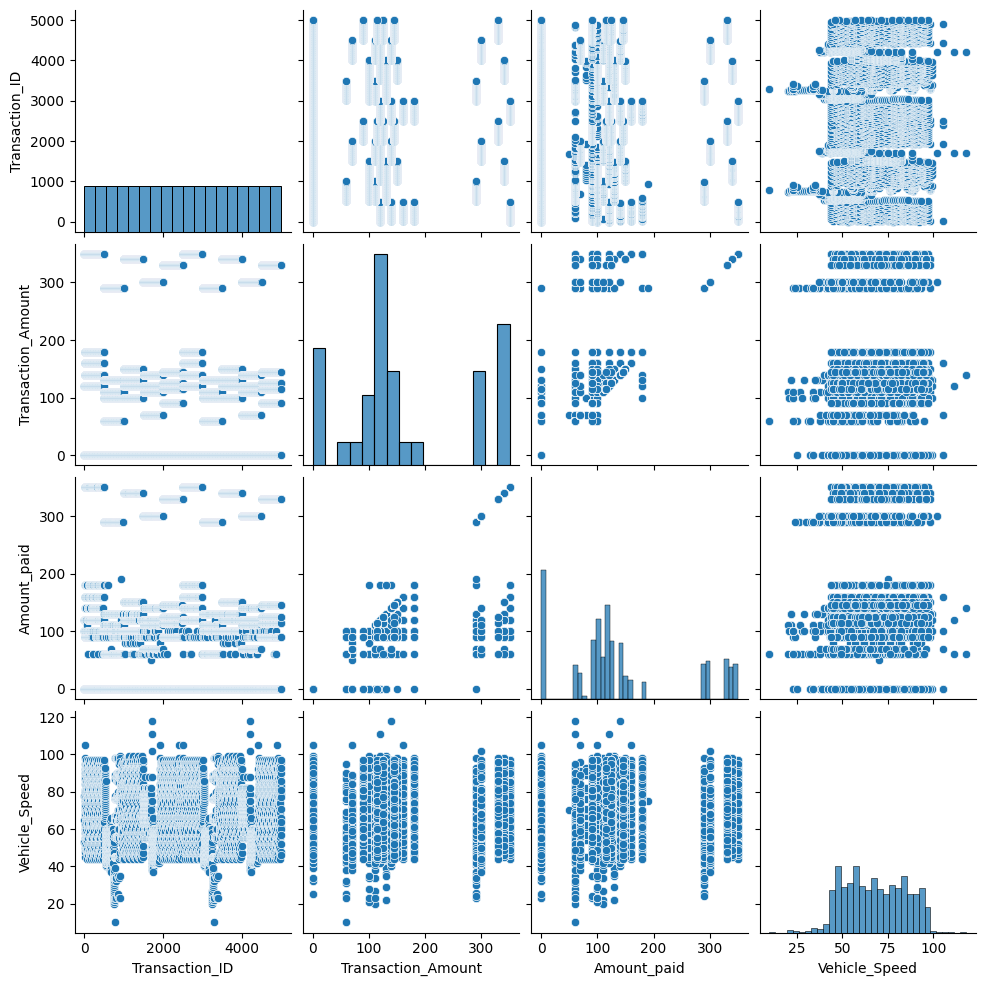

In [18]:
sns.pairplot(df)

In [19]:
df1=df.select_dtypes('number')
df1

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
0,1,350,120,65
1,2,120,100,78
2,3,0,0,53
3,4,350,120,92
4,5,140,100,60
...,...,...,...,...
4995,4996,330,330,81
4996,4997,125,125,64
4997,4998,115,115,93
4998,4999,145,145,57


In [20]:
df1.corr()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
Transaction_ID,1.000000,-0.023515,0.044433,0.014378
Transaction_Amount,-0.023515,1.000000,0.870078,0.053229
Amount_paid,0.044433,0.870078,1.000000,0.039027
Vehicle_Speed,0.014378,0.053229,0.039027,1.000000


<Axes: >

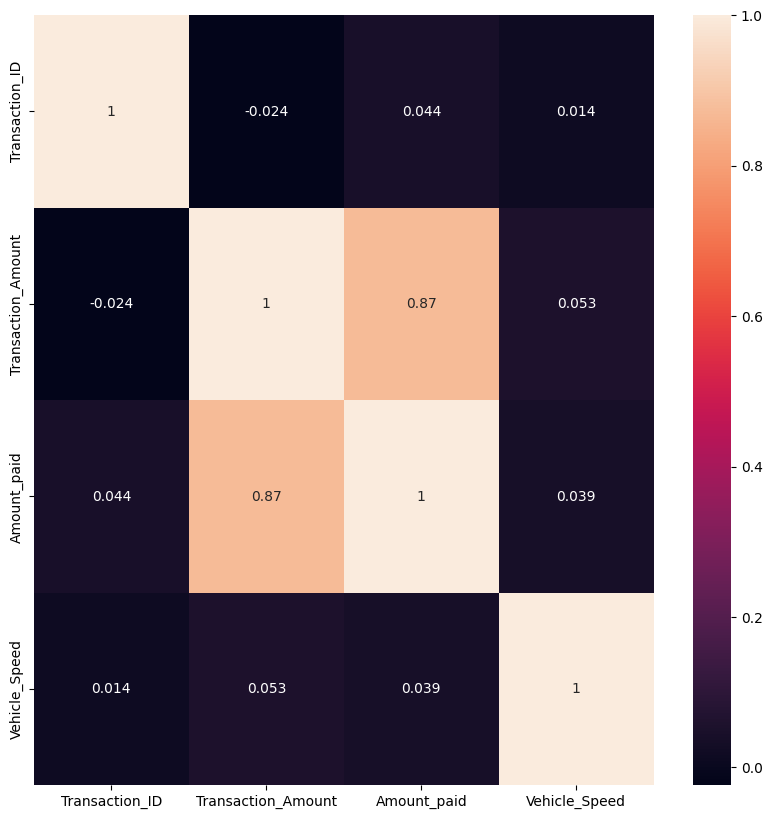

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

In [22]:
label_encoders={}
for column in['Vehicle_Type','Lane_Type','Vehicle_Dimensions','Geographical_Location','Vehicle_Plate_Number','Fraud_indicator','FastagID','TollBoothID',]:
  le = LabelEncoder()
  df[column]=le.fit_transform(df[column])
  label_encoders[column]=le

df.head(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,0,2,0,0,0,350,120,3,65,1482,0
1,2,1/7/2023 14:55,1,9,1,1,2,120,100,3,78,3066,0
2,3,1/8/2023 18:25,2,0,3,1,2,0,0,3,53,3663,1
3,4,1/9/2023 2:05,5,241,2,1,0,350,120,3,92,1498,0
4,5,1/10/2023 6:35,6,2860,1,0,1,140,100,3,60,2409,0


In [23]:
#convert timestanp column into date time and seprate hour minute and days
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Hour']=df['Timestamp'].dt.hour
df['Day']=df['Timestamp'].dt.day
df['Month']=df['Timestamp'].dt.month
df['Weekday']=df['Timestamp'].dt.weekday
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
3563,3564,2023-10-05 23:15:00,3,4259,1,1,0,150,150,0,93,4456,1,23,5,10,3
1024,1025,2023-08-16 22:27:00,2,59,5,1,2,0,0,0,52,74,1,22,16,8,2
2110,2111,2023-12-02 10:55:00,5,3145,2,0,0,330,330,4,71,4362,1,10,2,12,5
2412,2413,2023-11-19 03:00:00,6,2204,1,0,1,125,125,4,50,4363,1,3,19,11,6
3539,3540,2023-08-29 00:11:00,5,4181,2,1,0,340,340,0,79,2838,1,0,29,8,1


In [24]:
df.drop(columns=['Transaction_ID','Timestamp'],inplace = True)
df.head()

,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,Day,Month,Weekday
0,0,2,0,0,0,350,120,3,65,1482,0,11,6,1,4
1,1,9,1,1,2,120,100,3,78,3066,0,14,7,1,5
2,2,0,3,1,2,0,0,3,53,3663,1,18,8,1,6
3,5,241,2,1,0,350,120,3,92,1498,0,2,9,1,0
4,6,2860,1,0,1,140,100,3,60,2409,0,6,10,1,1


In [25]:
x=df.drop(columns='Fraud_indicator')
y=df['Fraud_indicator']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train , x_test, y_train,y_test

(      Vehicle_Type  FastagID  TollBoothID  Lane_Type  Vehicle_Dimensions  \
 4227             4       155            0          1                   1   
 4676             3      1028            1          0                   0   
 800              2         0            5          1                   2   
 3671             2         0            5          1                   2   
 4193             3      1369            1          1                   0   
 ...            ...       ...          ...        ...                 ...   
 4426             1      2434            0          0                   2   
 466              6      3232            1          0                   1   
 3092             6      3449            1          0                   1   
 3772             4       716            0          0                   1   
 860              3      3585            1          0                   0   
 
       Transaction_Amount  Amount_paid  Geographical_Location  Vehicle_Spe

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [28]:
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Logistic Regression Model Results:")
print("Accuracy:", accuracy)
print('confusion Matrix :',conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Logistic Regression Model Results:
Accuracy: 0.984
confusion Matrix : [[201  16]
 [  0 783]]
Precision: 0.9799749687108886
Recall: 1.0
F1 Score: 0.9898862199747155


In [29]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)
y_pred1


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [30]:
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

0.999

In [31]:
accuracy1 = accuracy_score(y_test,y_pred1)
conf_matrix1 = confusion_matrix(y_test,y_pred1)
precision1 = precision_score(y_test,y_pred1)
recall1 = recall_score(y_test,y_pred1)
f11 = f1_score(y_test,y_pred1)
print("Decision Tree Classification Model Results:")
print("Accuracy:", accuracy1)
print('confusion Matrix :',conf_matrix1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f11)

Decision Tree Classification Model Results:
Accuracy: 0.999
confusion Matrix : [[216   1]
 [  0 783]]
Precision: 0.9987244897959183
Recall: 1.0
F1 Score: 0.9993618379068284


In [32]:
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [33]:
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy2

0.978

In [34]:
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2 = confusion_matrix(y_test,y_pred2)
precision2 = precision_score(y_test,y_pred2)
recall2 = recall_score(y_test,y_pred2)
f12 = f1_score(y_test,y_pred2)
print("Random Forest Classification Model Results:")
print("Accuracy:", accuracy2)
print('confusion Matrix :',conf_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 Score:", f12)


Random Forest Classification Model Results:
Accuracy: 0.978
confusion Matrix : [[195  22]
 [  0 783]]
Precision: 0.9726708074534162
Recall: 1.0
F1 Score: 0.9861460957178841


In [35]:
from sklearn.svm import SVC

model3 = SVC()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)
y_pred3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
accuracy3 = accuracy_score(y_test,y_pred3)
accuracy3

0.793

In [37]:
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f13 = f1_score(y_test, y_pred3)
print("SVM Model Results:")
print("Accuracy:", accuracy3)
print("Confusion Matrix:", conf_matrix3)
print("Precision:", precision3)
print("Recall:", recall3)
print("F1 Score:", f13)

SVM Model Results:
Accuracy: 0.793
Confusion Matrix: [[ 10 207]
 [  0 783]]
Precision: 0.7909090909090909
Recall: 1.0
F1 Score: 0.883248730964467


In [41]:
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB()
model4.fit(x_train,y_train)

y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,

In [42]:
accuracy4 = accuracy_score(y_test,y_pred4)
accuracy4

0.777

In [43]:
accuracy4 = accuracy_score(y_test,y_pred4)
conf_matrix4 = confusion_matrix(y_test,y_pred4)
precision4 = precision_score(y_test,y_pred4)
recall4 = recall_score(y_test,y_pred4)
f14 = f1_score(y_test,y_pred4)
print("Naive Bayes Model Results:")
print("Accuracy:", accuracy4)
print("Confusion Matrix:", conf_matrix4)
print("Precision:", precision4)
print("Recall:", recall4)
print("F1 Score:", f14)


Naive Bayes Model Results:
Accuracy: 0.777
Confusion Matrix: [[148  69]
 [154 629]]
Precision: 0.9011461318051576
Recall: 0.8033205619412516
F1 Score: 0.8494260634706279


In [47]:
from sklearn.neighbors import KNeighborsClassifier

model5 = KNeighborsClassifier(n_neighbors=3)
model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)
y_pred5

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [49]:
accuracy5 = accuracy_score(y_test, y_pred5)
conf_matrix5 = confusion_matrix(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f15 = f1_score(y_test, y_pred5)
print("KNN Model Results:")
print("Accuracy:", accuracy5)
print("Confusion Matrix:", conf_matrix5)
print("Precision:", precision5)
print("Recall:", recall5)
print("F1 Score:", f15)


KNN Model Results:
Accuracy: 0.797
Confusion Matrix: [[ 62 155]
 [ 48 735]]
Precision: 0.8258426966292135
Recall: 0.9386973180076629
F1 Score: 0.8786610878661089


In [50]:
model6 = GradientBoostingClassifier()
model6.fit(x_train, y_train)

y_pred6 = model6.predict(x_test)
y_pred6


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

In [51]:
 accuracy6 = accuracy_score(y_test, y_pred6)
conf_matrix6 = confusion_matrix(y_test, y_pred6)
precision6 = precision_score(y_test, y_pred6)
recall6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)
print("Gradient Boosting Model Results:")
print("Accuracy:", accuracy6)
print("Confusion Matrix:", conf_matrix6)
print("Precision:", precision6)
print("Recall:", recall6)
print("F1 Score:", f16)

Gradient Boosting Model Results:
Accuracy: 0.988
Confusion Matrix: [[205  12]
 [  0 783]]
Precision: 0.9849056603773585
Recall: 1.0
F1 Score: 0.9923954372623575
